In [1]:
# Examine the upper limit of MLL=1/M**3 (M is num of grid) for step
# 0->Step, 1->Ramp
# def generate_test_spike_trains(M=20, N=400, T=100, rmin=1, rmax=100, 
#                                bmin=0, bmax=4, logsmin=0.04, logsmax=4, 
#                                mmin=0, mmax=100, xmin=0, xmax=1,
#                                model="original", GammaShape=None):


N=400

# Do nor change:

from models import *
from models2 import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import time
num_grid = 10
K = 20 # K for ramp inference
T=100
start_time = time.time()
time_points = np.linspace(1,T,T) # 0,1,2,...
dt = 1/T
time_ms = time_points * dt * 1e3
Rh = 50
values_r = np.linspace(1, 10, num_grid)
values_m = np.linspace(0, 100, num_grid)
values_logs = np.linspace(np.log(0.04), np.log(4),num_grid) # -3.22 - 1.386
values_b = np.linspace(0, 4, num_grid)
values_x0 = np.linspace(0, 1, num_grid)

logMLRs = np.zeros((num_grid,num_grid))
ramp_MLLs = np.zeros((num_grid,num_grid))
step_MLLs = np.zeros((num_grid,num_grid))
x0 = 0.2
num=0

for m_idx in range(num_grid):
    for r_idx in range(num_grid):
#             for x_idx in range(num_grid):
        m = values_m[m_idx]
        r = values_r[r_idx]
#                 x0 = values_x0[x_idx]
        step = StepModel(r=r, m=m, x0=x0, Rh=Rh)
        [step_spikes, _, _, _, _] = step.simulate_HMM_inhomo(Ntrials=N, T=T, get_rate=True, GammaShape=2)
        counts_matrix= generate_psth(spike_trains=step_spikes, return_counts=True);
        logMLR, ramp_MLL, step_MLL = MLR_calculator(counts_matrix, M = num_grid, K = K, Print=True)
        logMLRs[m_idx,r_idx]=logMLR
        ramp_MLLs[m_idx,r_idx]= ramp_MLL
        step_MLLs[m_idx,r_idx]=step_MLL
        end_time = time.time()
        elapsed_time = end_time - start_time
        num+=1
        print(f"{num}/{num_grid**2}, {elapsed_time} s")

Ramp marginal log-likelihood inferred： 78.27843618392944 s
Step marginal log-likelihood inferred： 13.920638084411621 s
1/100, 92.2309410572052 s
Ramp marginal log-likelihood inferred： 75.02917313575745 s
Step marginal log-likelihood inferred： 13.9286470413208 s
2/100, 181.2216351032257 s
Ramp marginal log-likelihood inferred： 75.29692387580872 s
Step marginal log-likelihood inferred： 13.988142967224121 s
3/100, 270.5401768684387 s
Ramp marginal log-likelihood inferred： 75.14944100379944 s
Step marginal log-likelihood inferred： 14.155213832855225 s
4/100, 359.87780714035034 s
Ramp marginal log-likelihood inferred： 77.26608395576477 s
Step marginal log-likelihood inferred： 14.64232087135315 s
5/100, 451.8184609413147 s
Ramp marginal log-likelihood inferred： 77.0976791381836 s
Step marginal log-likelihood inferred： 15.023925065994263 s
6/100, 543.9728589057922 s
Ramp marginal log-likelihood inferred： 78.0068609714508 s
Step marginal log-likelihood inferred： 14.439310073852539 s
7/100, 636

Ramp marginal log-likelihood inferred： 73.44649004936218 s
Step marginal log-likelihood inferred： 13.774351835250854 s
57/100, 5129.5912210941315 s
Ramp marginal log-likelihood inferred： 76.41627216339111 s
Step marginal log-likelihood inferred： 14.406836986541748 s
58/100, 5220.59699511528 s
Ramp marginal log-likelihood inferred： 76.74417209625244 s
Step marginal log-likelihood inferred： 14.596188306808472 s
59/100, 5312.12321805954 s
Ramp marginal log-likelihood inferred： 77.92248797416687 s
Step marginal log-likelihood inferred： 13.996845006942749 s
60/100, 5404.228414058685 s
Ramp marginal log-likelihood inferred： 73.73970198631287 s
Step marginal log-likelihood inferred： 13.8625328540802 s
61/100, 5492.0095801353455 s
Ramp marginal log-likelihood inferred： 73.7139081954956 s
Step marginal log-likelihood inferred： 14.95082712173462 s
62/100, 5580.865294218063 s
Ramp marginal log-likelihood inferred： 75.46232032775879 s
Step marginal log-likelihood inferred： 14.234043836593628 s
63/

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


step precision: 76.0%, n: 400
-65.07413813639245
-64.5935881540931


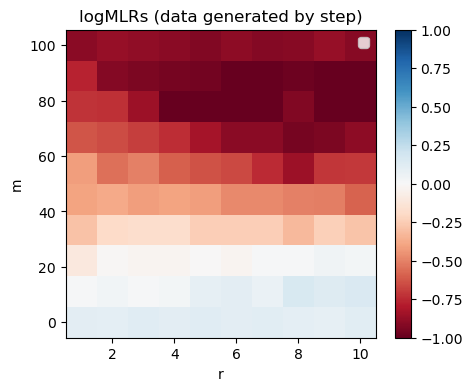

In [2]:
ave_logMLRs = logMLRs/N
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
X, Y = np.meshgrid(values_r, values_m)
im = ax.pcolormesh(X, Y, ave_logMLRs, cmap='RdBu', vmin=-1, vmax=1)

ax.set_title("logMLRs (data generated by step)")
ax.set_xlabel("r")
ax.set_ylabel("m")
# plt.xticks(range(M), [1, 25, 50, 75, 100])
# plt.yticks(range(M), [0, 25, 50, 75, 100])
ax.legend()
fig.colorbar(im) #, shrink=0.25)   

print(f"step precision: {np.sum(ave_logMLRs < 0)/num_grid**2*100}%, n: {N}")


print(np.average(ramp_MLLs/N))
print(np.average(step_MLLs/N))